In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('./buah.jpeg')

In [3]:
hsv_layer = cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [4]:
lower_red = np.array([0, 60, 50])
upper_red = np.array([10, 255, 255])
red_mask = cv.inRange(hsv_layer, lower_red, upper_red)

In [5]:
non_red_mask = cv.bitwise_not(red_mask)
red_obj = img.copy()
red_obj[non_red_mask != 0] = [0, 0, 0]

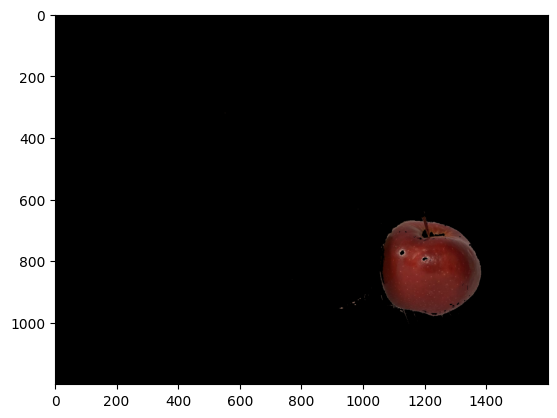

In [6]:
red_obj = cv.cvtColor(red_obj, cv.COLOR_BGR2RGB)
plt.imshow(red_obj)

In [7]:
upper_yellow = np.array([24, 255, 255])
lower_yellow = np.array([10, 120, 80])
yellow_mask = cv.inRange(hsv_layer, lower_yellow, upper_yellow)
non_yellow_mask = cv.bitwise_not(yellow_mask)

In [8]:
ylw_obj = img.copy()
ylw_obj[non_yellow_mask != 0] = [0, 0, 0]

In [9]:
ylw_obj = cv.cvtColor(ylw_obj, cv.COLOR_BGR2RGB)

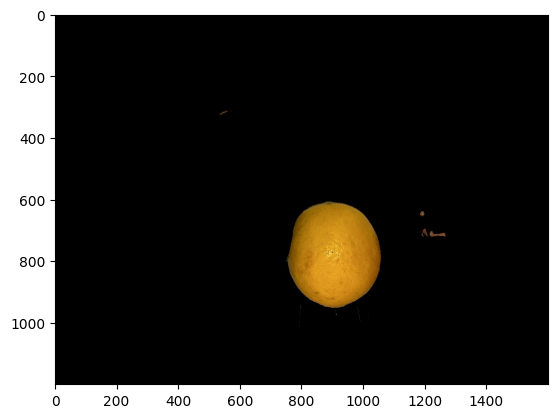

In [10]:
plt.imshow(ylw_obj, cmap='gray')

In [11]:
green_mask = cv.inRange(hsv_layer, (30, 50, 50), (80, 255, 255))
green_objects = cv.bitwise_and(img, img, mask=green_mask)
green_objects = cv.cvtColor(green_objects, cv.COLOR_BGR2RGB)

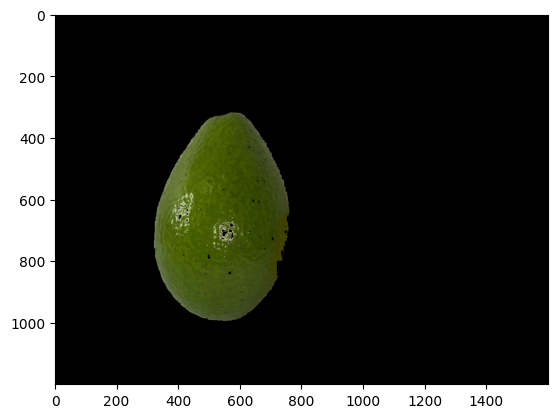

In [12]:
plt.imshow(green_objects)

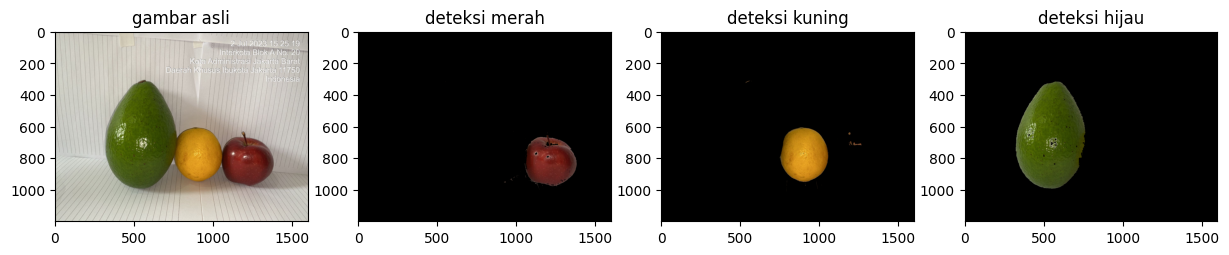

In [13]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs = axs.ravel()

axs[0].set_title('gambar asli')
axs[0].imshow(img)

axs[1].set_title('deteksi merah')
axs[1].imshow(red_obj)

axs[2].set_title('deteksi kuning')
axs[2].imshow(ylw_obj)

axs[3].set_title('deteksi hijau')
axs[3].imshow(green_objects)